<a href="https://colab.research.google.com/github/chetana2003/Html-files/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Advertising.csv")

In [ ]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
62,63,239.3,15.5,27.3,15.7
64,65,131.1,42.8,28.9,18.0
96,97,197.6,3.5,5.9,11.7
95,96,163.3,31.6,52.9,16.9
172,173,19.6,20.1,17.0,7.6


In [ ]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [ ]:
df.sample(2)

,TV,Radio,Newspaper,Sales
49,66.9,11.7,36.8,9.7
96,197.6,3.5,5.9,11.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


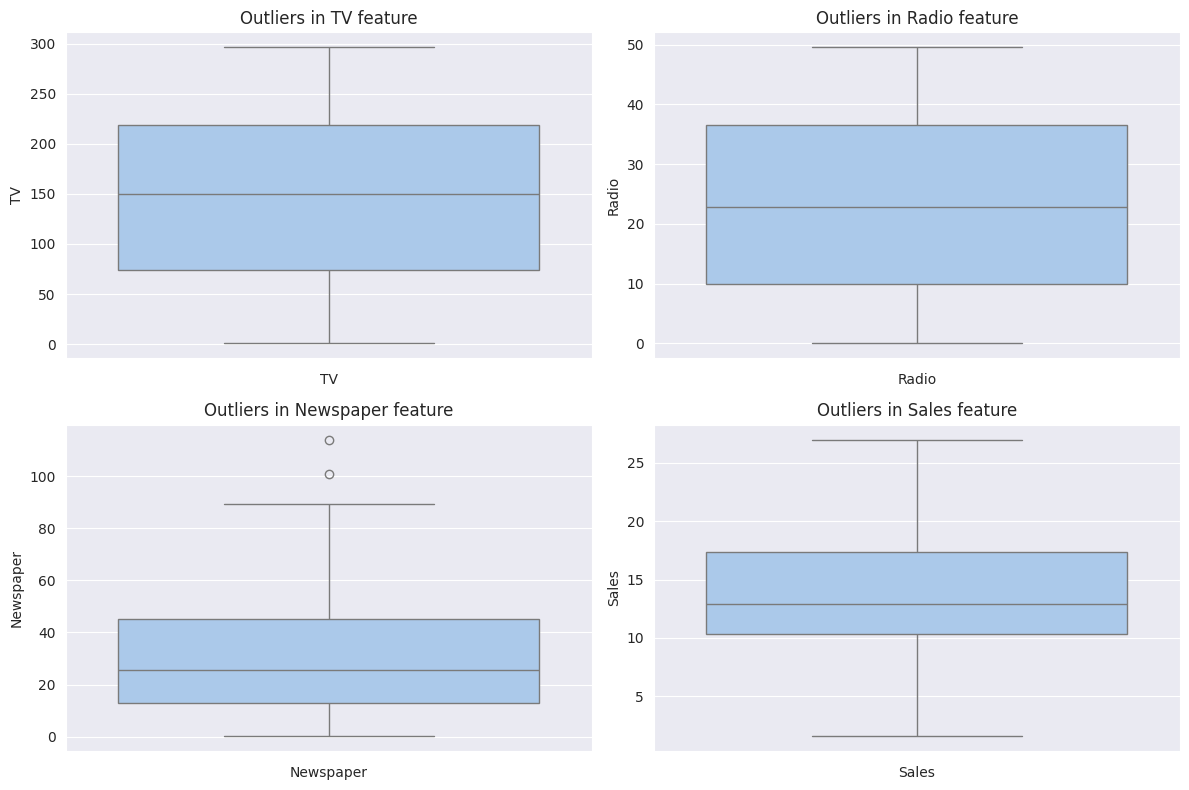

In [ ]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

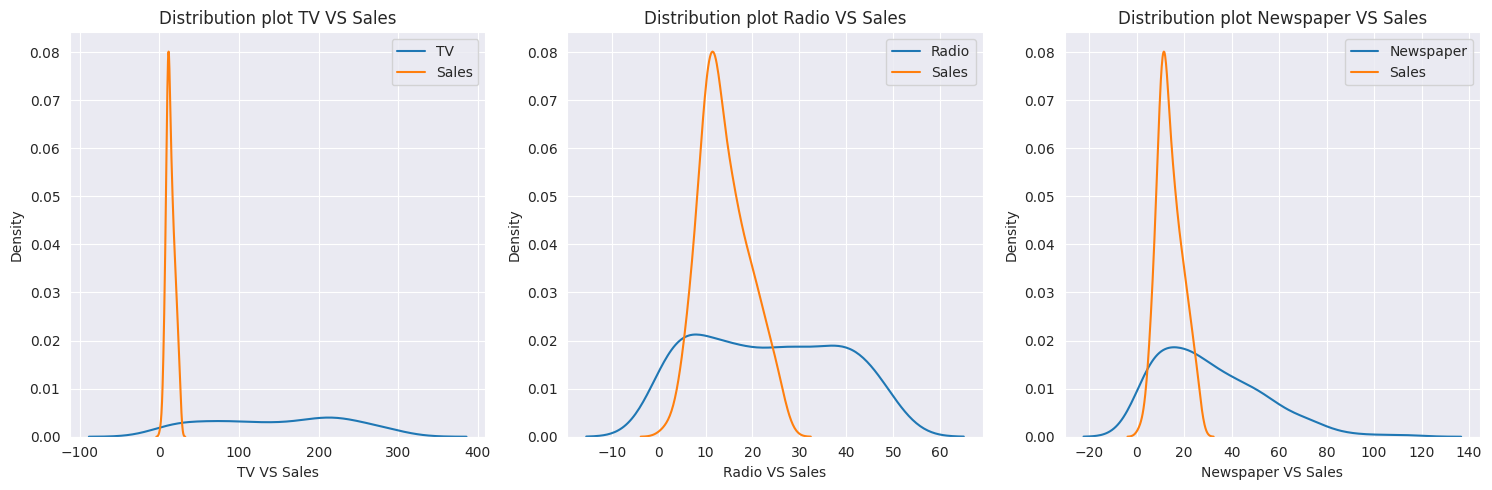

In [ ]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


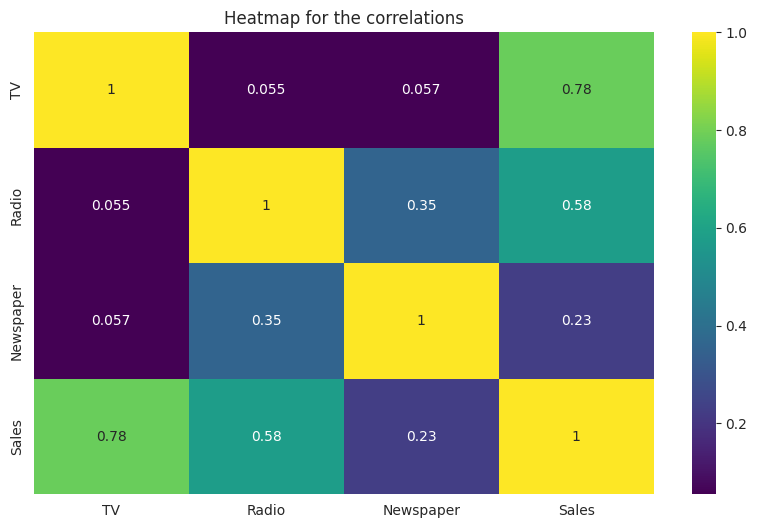

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()


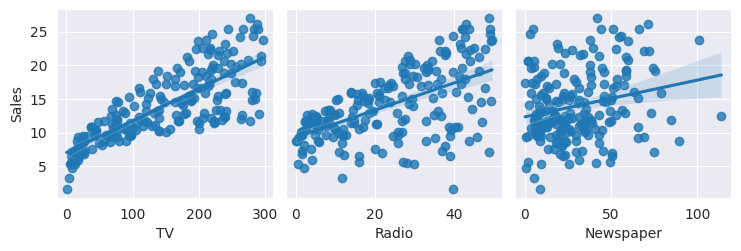

In [ ]:
sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

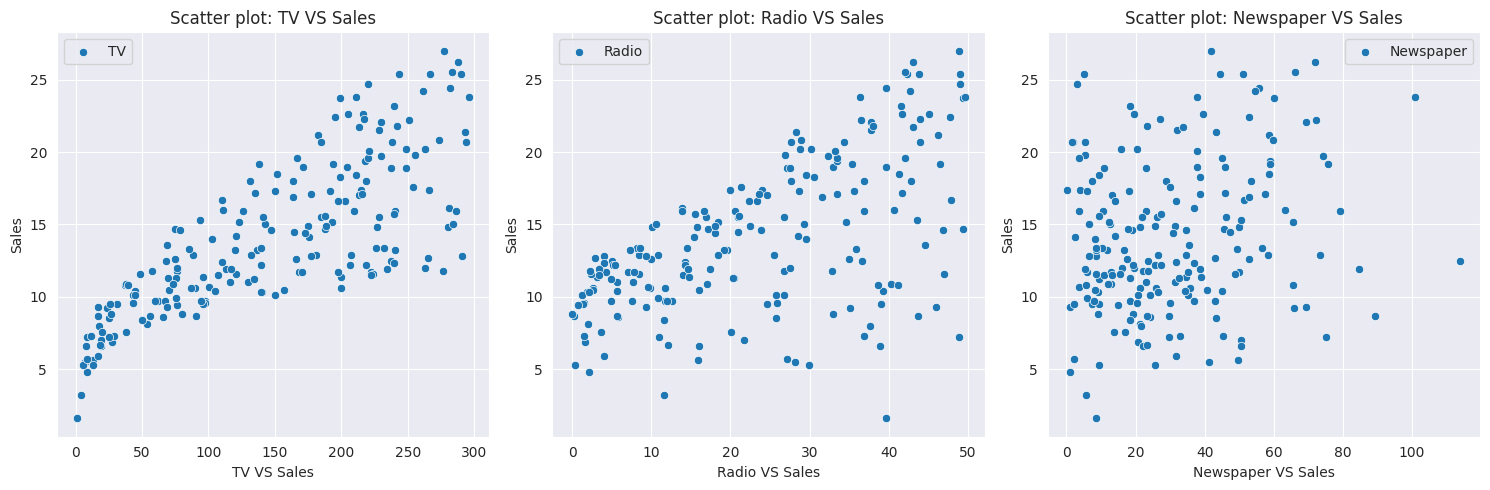

In [ ]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


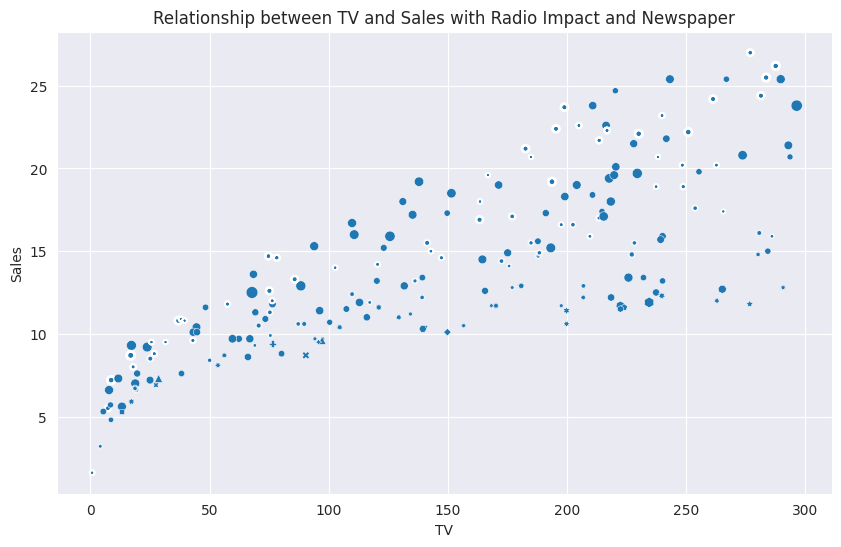

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

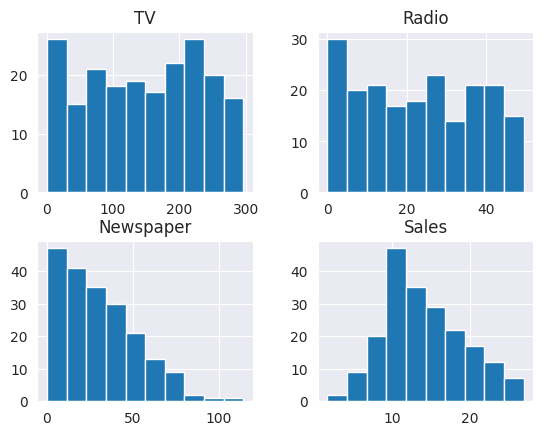

In [ ]:
df.hist()
plt.show()

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop(columns="Sales",axis=1)
y=df["Sales"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 108.88563941729085
R2 Score: 0.9137298616704539
Cross-Validation R2: 0.8829076766313095


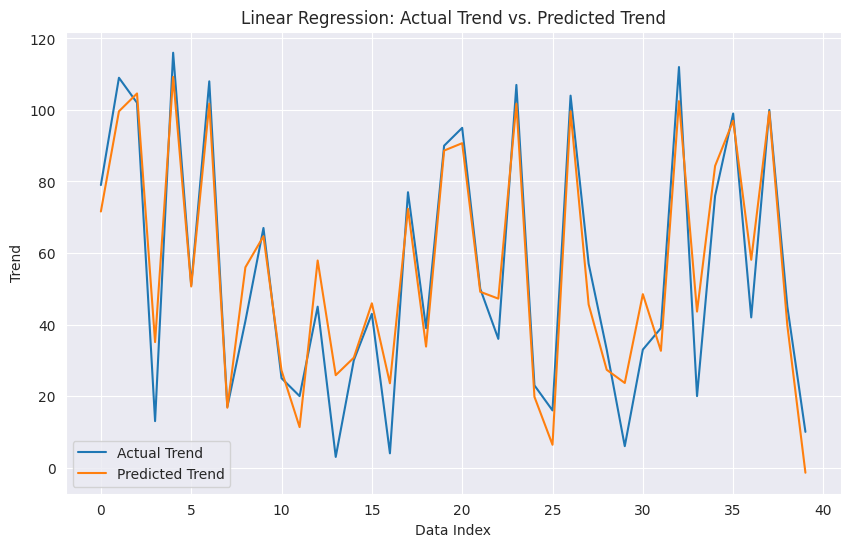


Ridge Regression
Mean Squared Error: 124.16557474271458
R2 Score: 0.9016235624261708
Cross-Validation R2: 0.8744917309227282


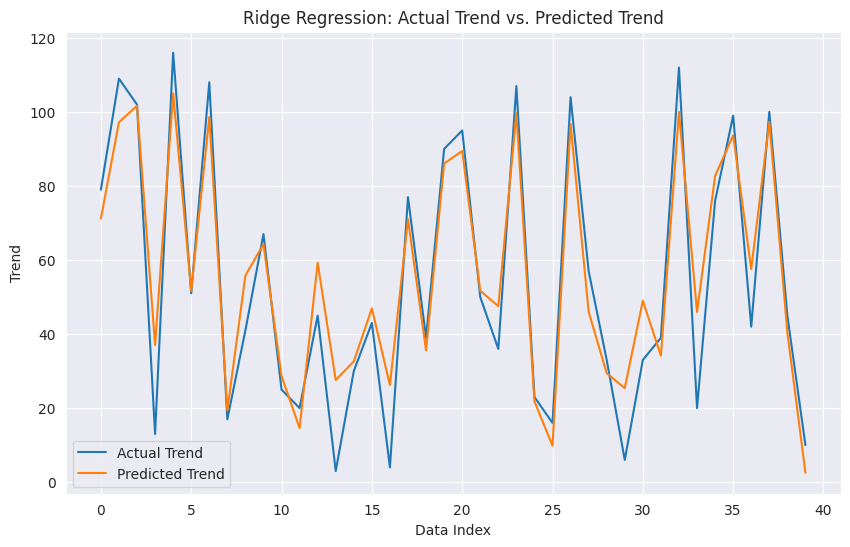


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross-Validation R2: 0.8556271875371658


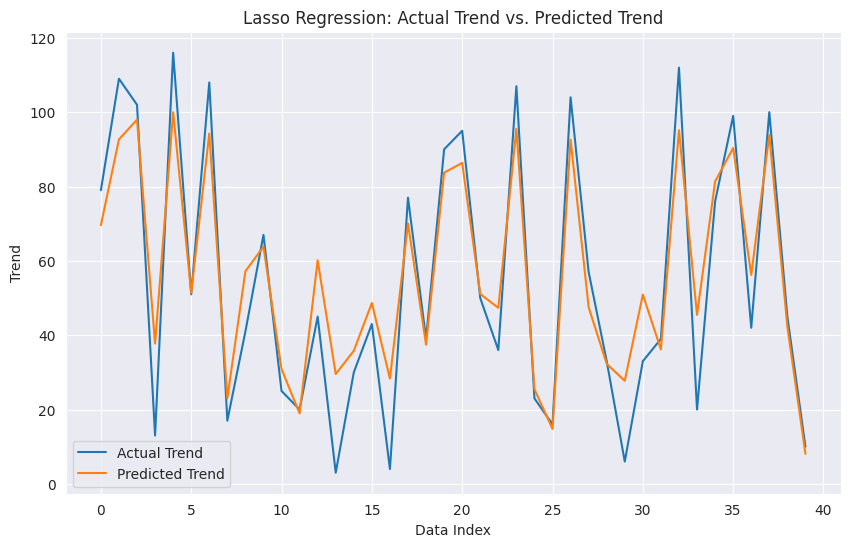

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 100
Enter the Radio value: 50
Enter the Newspaper value: 60
-------------------------------------
Predicted Sales : [9.37697774]
